# Bank Credit Card User's Data Set - EDA

##### CLIENTNUM: 
    
    Benzersiz müşteri tanımlayıcı.

##### Attrition_Flag : 
    
    Müşterinin hesabının aktif mi yoksa kapatılmış mı olduğunu belirtir.

##### Demografik Özellikler: 

    Customer_Age : Müşterinin yaşı.
    Cinsiyet : Müşterinin cinsiyeti.
    Dependent_count : Müşterinin bakmakla yükümlü olduğu kişi sayısı.
    Education_Level : Müşterinin eğitim düzeyi.
    Medeni_Status : Müşterinin medeni durumu.
##### Finansal:

    Income_Category : Müşterinin gelir kategorisi.       
##### Banka müsterisi olarak kisiye ait bilgiler:

    Card_Category : Müşterinin elinde bulunan kredi kartının kategorisi.
    Months_on_book : Müşterinin banka müşterisi olduğu ay sayısı.
    Total_Relationship_Count : Müşterinin elinde bulunan toplam banka ürünü sayısı.
    Months_Inactive_12_mon : Son 12 ayda işlem yapılmayan ayların sayısı.
    Contacts_Count_12_mon : Son 12 ay içinde bankayla yapılan temasların sayısı.
    Credit_Limit : Kredi kartındaki kredi limiti.
    Total_Revolving_Bal : Kredi kartındaki toplam döner bakiye.
    Avg_Open_To_Buy : Kredi kartındaki ortalama açık satın alma kredi limiti.
    Total_Amt_Chng_Q4_Q1 : Son dört çeyrekte işlem tutarındaki değişiklik.
    Total_Trans_Amt : Son 12 aydaki toplam işlem tutarı.
    Total_Trans_Ct : Son 12 aydaki toplam işlem sayısı.
    Total_Ct_Chng_Q4_Q1 : Son dört çeyrekte işlem sayısındaki değişiklik.
    Avg_Utilization_Ratio : Kredi kartının ortalama kullanım oranı.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)


In [3]:
df = pd.read_excel("CreditCard_Customer_data.xlsx")

In [4]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1335.000,1144,42,1625.000,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1541.000,1291,33,3714.000,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2594.000,1887,20,2333.000,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1405.000,1171,20,2333.000,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2175.000,816,28,45048.000,0.000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [6]:
df.describe([0.90,0.95,0.99]).T      #Outlier'lara ilk bakista ...

,count,mean,std,min,50%,90%,95%,99%,max
CLIENTNUM,10127.000,739177606.334,36903783.450,708082083.000,717926358.000,798512118.000,814212033.000,825250761.000,828343083.000
Customer_Age,10127.000,46.326,8.017,26.000,46.000,57.000,60.000,65.000,73.000
Dependent_count,10127.000,2.346,1.299,0.000,2.000,4.000,4.000,5.000,5.000
Months_on_book,10127.000,35.928,7.986,13.000,36.000,46.000,50.000,56.000,56.000
Total_Relationship_Count,10127.000,3.813,1.554,1.000,4.000,6.000,6.000,6.000,6.000
Months_Inactive_12_mon,10127.000,2.341,1.011,0.000,2.000,3.000,4.000,6.000,6.000
Contacts_Count_12_mon,10127.000,2.455,1.106,0.000,2.000,4.000,4.000,5.000,6.000
Credit_Limit,10127.000,8631.954,9088.777,1438.300,4549.000,23400.200,34516.000,34516.000,34516.000
Total_Revolving_Bal,10127.000,1162.814,814.987,0.000,1276.000,2228.400,2517.000,2517.000,2517.000
Avg_Open_To_Buy,10127.000,7469.140,9090.685,3.000,3474.000,21964.600,32183.400,34294.140,34516.000


In [9]:
df.describe(include='O').T     # Descriptive analysis for categorical data

,count,unique,top,freq
Attrition_Flag,10127,2,Existing Customer,8500
Gender,10127,2,F,5358
Education_Level,10127,7,Graduate,3128
Marital_Status,10127,4,Married,4687
Income_Category,10127,6,Less than $40K,3561
Card_Category,10127,4,Blue,9436


In [10]:
df['Income_Category'].value_counts()

Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: count, dtype: int64

In [11]:
df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

#### Distribution of Credit Card Holders by Age

array([[<Axes: title={'center': 'Customer_Age'}>]], dtype=object)

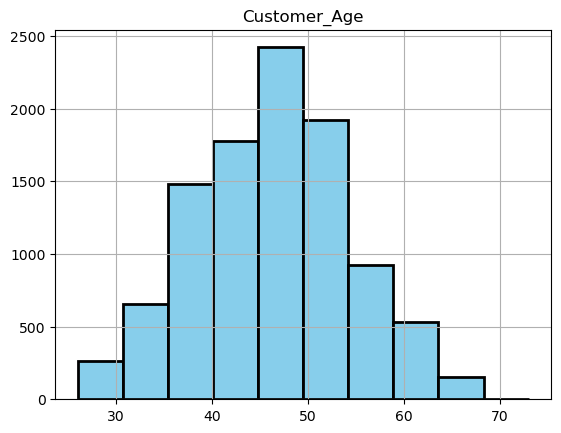

In [12]:
df.hist('Customer_Age',color = "skyblue", ec="black", lw=2)

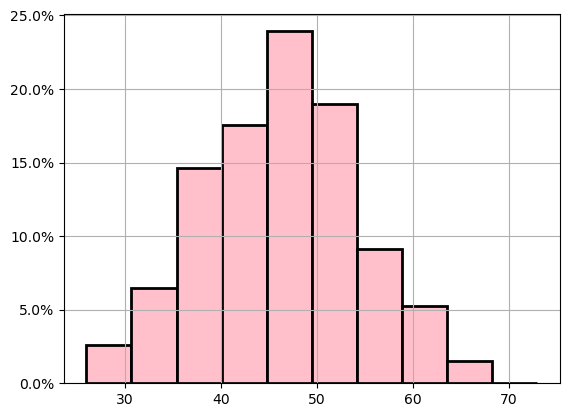

In [13]:
#apply percentage format to y-axis

from matplotlib.ticker import PercentFormatter

#create histogram, using percentages instead of counts

plt.hist(df['Customer_Age'], weights=np.ones(len(df)) / len(df), color = 'pink', edgecolor="black", lw=2)
plt.grid(True) ##Grid plotting

#apply percentage format to y-axis
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()


#### Distribution of Credit Card Holders by Marital Status 

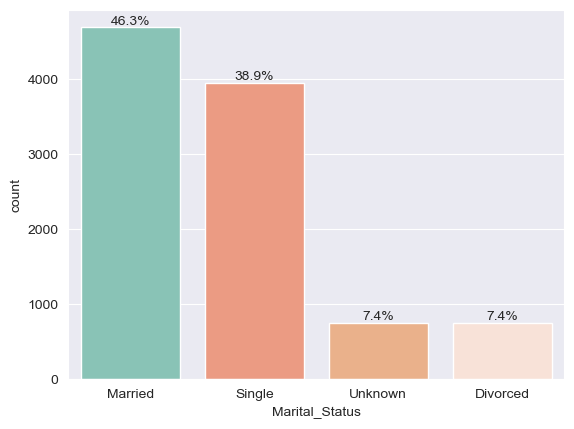

In [14]:
sns.set_style("darkgrid")
ax = sns.countplot(x = df['Marital_Status'], palette=["#7fcdbb","#fc9272","#FAAE7B","#fee0d2"])
# get the total count of the type column
total = df['Marital_Status'].count()

# annotate the bars with fmt from matplotlib v3.7.0
ax.bar_label(ax.containers[0], fmt=lambda x: f'{(x/total)*100:0.1f}%')
plt.show()

#### Distribution of Credit Card Holders by Income Category

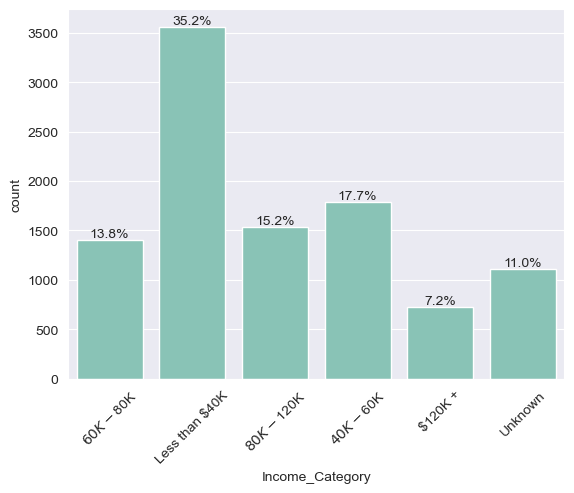

In [59]:
sns.set_style("darkgrid")
ax = sns.countplot(x = df['Income_Category'], palette=["#7fcdbb"])
# get the total count of the type column
total = df['Income_Category'].count()

# annotate the bars with fmt from matplotlib v3.7.0
ax.bar_label(ax.containers[0], fmt=lambda x: f'{(x/total)*100:0.1f}%')
plt.xticks(rotation=45)
plt.show()

#### Distribution of Credit Card Holders by Education Level

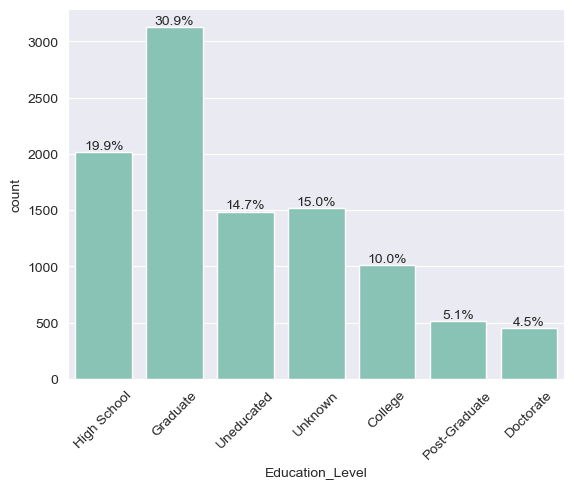

In [15]:
sns.set_style("darkgrid")
ax = sns.countplot(x = df['Education_Level'], palette=["#7fcdbb"])

# get the total count of the type column
total = df['Education_Level'].count()

# annotate the bars with fmt from matplotlib v3.7.0
ax.bar_label(ax.containers[0], fmt=lambda x: f'{(x/total)*100:0.1f}%')
plt.xticks(rotation=45)
plt.show()

#### Distribution of Credit Card Holders by Card Category

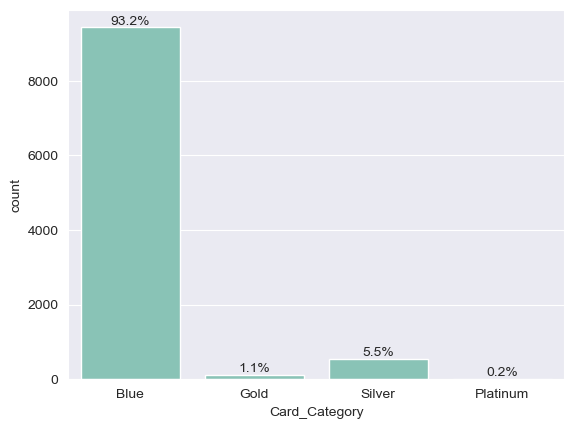

In [24]:
sns.set_style("darkgrid")
ax = sns.countplot(x = df['Card_Category'], palette=["#7fcdbb"])

# get the total count of the type column
total = df['Card_Category'].count()

# annotate the bars with fmt from matplotlib v3.7.0
ax.bar_label(ax.containers[0], fmt=lambda x: f'{(x/total)*100:0.1f}%')
plt.show()

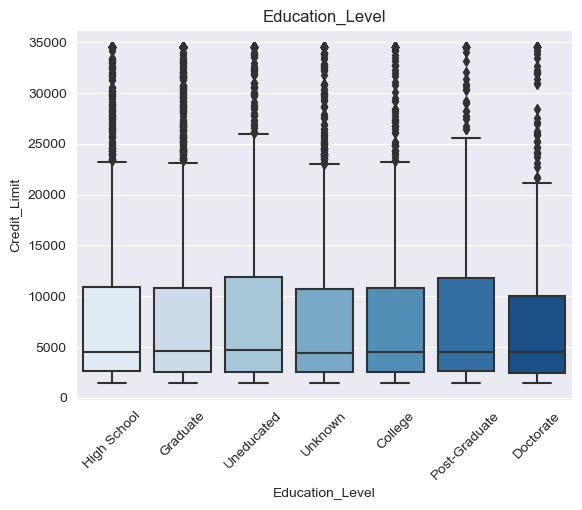

In [17]:
plt.title('Education_Level')
sns.boxplot(x=df['Education_Level'], y=df.Credit_Limit, palette=('Blues'))
plt.xticks(rotation=45)
plt.show()

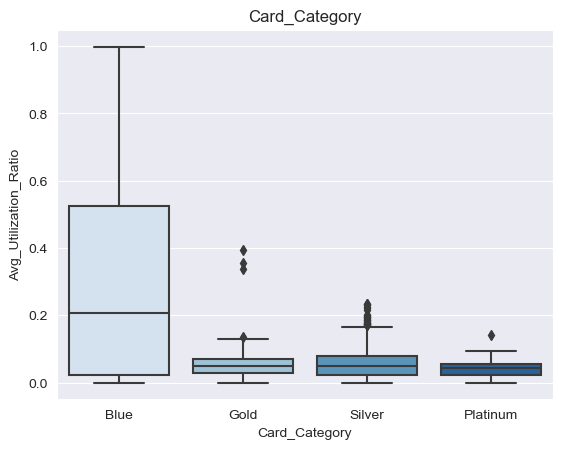

In [18]:
plt.title('Card_Category')
sns.boxplot(x=df['Card_Category'], y=df['Avg_Utilization_Ratio'], palette=('Blues'))
plt.show()

### Correlation 

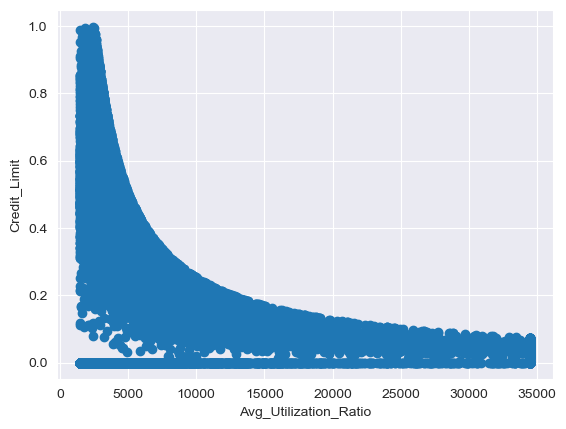

In [19]:
plt.scatter(df['Credit_Limit'], df['Avg_Utilization_Ratio'])
plt.xlabel("Avg_Utilization_Ratio")
plt.ylabel("Credit_Limit")
plt.show()

<Axes: title={'center': 'Attrition_Flag vs Credit_Limit'}, xlabel='Attrition_Flag', ylabel='Credit_Limit'>

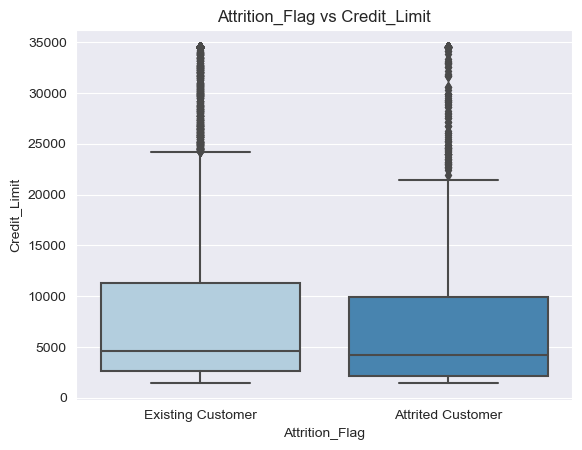

In [20]:
plt.title('Attrition_Flag vs Credit_Limit')
sns.boxplot(x=df['Attrition_Flag'], y=df["Credit_Limit"], palette=('Blues'))

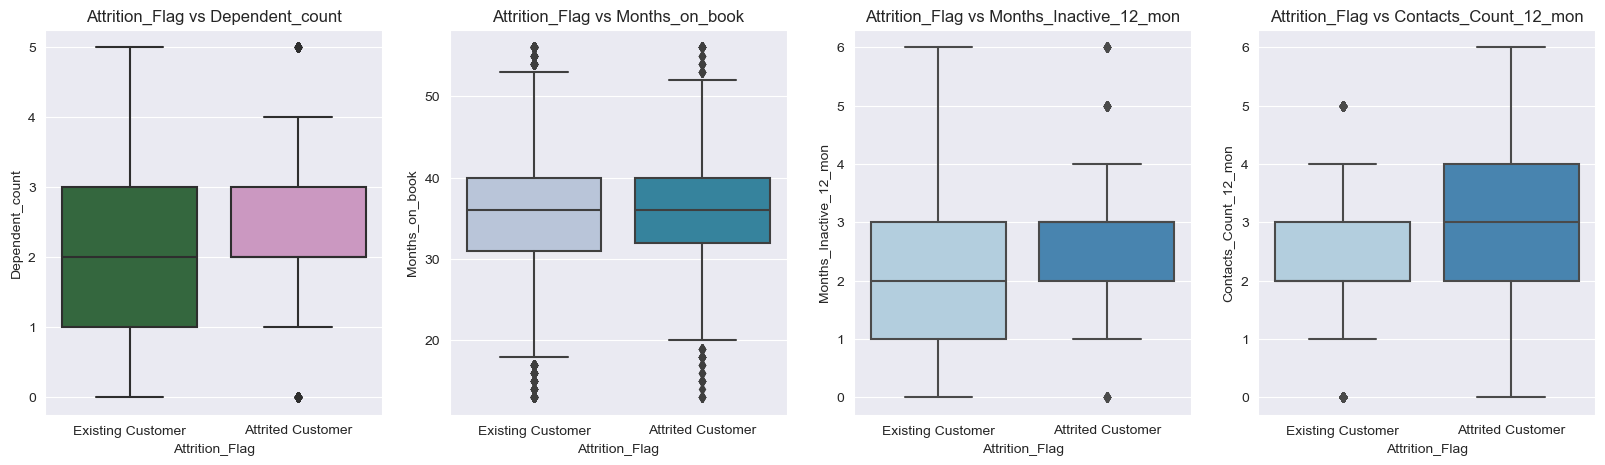

In [21]:
plt.figure(figsize=(20,5))

plt.subplot(1,4,1)
plt.title('Attrition_Flag vs Dependent_count')
sns.boxplot(x=df.Attrition_Flag, y=df.Dependent_count, palette=("cubehelix"))

plt.subplot(1,4,2)
plt.title('Attrition_Flag vs Months_on_book')
sns.boxplot(x=df.Attrition_Flag, y=df.Months_on_book, palette=("PuBuGn"))

plt.subplot(1,4,3)
plt.title('Attrition_Flag vs Months_Inactive_12_mon')
sns.boxplot(x=df.Attrition_Flag, y=df.Months_Inactive_12_mon, palette=("Blues"))


plt.subplot(1,4,4)
plt.title('Attrition_Flag vs Contacts_Count_12_mon')
sns.boxplot(x=df.Attrition_Flag, y=df.Contacts_Count_12_mon, palette=("Blues"))

plt.show()

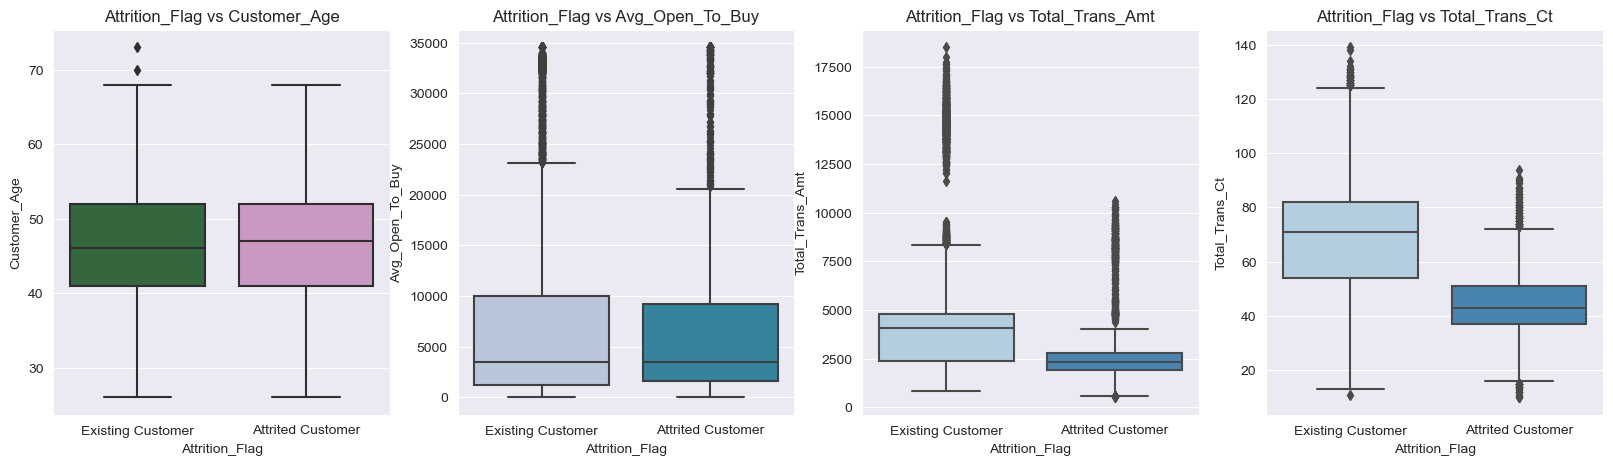

In [57]:
plt.figure(figsize=(20,5))

plt.subplot(1,4,1)
plt.title('Attrition_Flag vs Customer_Age')
sns.boxplot(x=df.Attrition_Flag, y=df.Customer_Age, palette=("cubehelix"))

plt.subplot(1,4,2)
plt.title('Attrition_Flag vs Avg_Open_To_Buy')
sns.boxplot(x=df.Attrition_Flag, y=df.Avg_Open_To_Buy, palette=("PuBuGn"))

plt.subplot(1,4,3)
plt.title('Attrition_Flag vs Total_Trans_Amt')
sns.boxplot(x=df.Attrition_Flag, y=df.Total_Trans_Amt, palette=("Blues"))


plt.subplot(1,4,4)
plt.title('Attrition_Flag vs Total_Trans_Ct')
sns.boxplot(x=df.Attrition_Flag, y=df.Total_Trans_Ct, palette=("Blues"))

plt.show()

In [23]:
import warnings
warnings.filterwarnings('ignore')